C:\Users\ved\Desktop\Speech-Completition-Prediction\python\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\ved\Desktop\Speech-Completition-Prediction\python\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\ved\Desktop\Speech-Completition-Prediction\python\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\ved\Desktop\Speech-Completition-Prediction\python\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\ved\Desktop\Speech

Clustering complete.


C:\Users\ved\AppData\Local\Temp\ipykernel_14636\3559800514.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("tab20", n_clusters + 1)


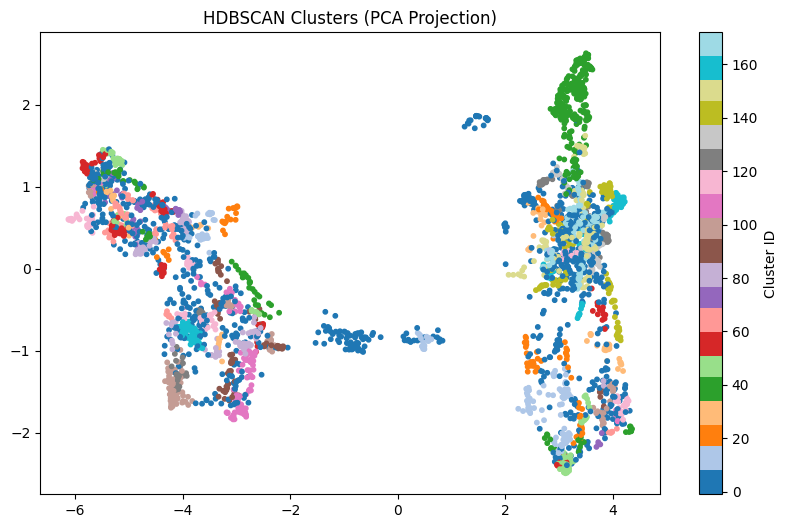

In [1]:
import pandas as pd
import numpy as np
import hdbscan
import ast
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from umap import UMAP
import matplotlib.colors as mcolors

df = pd.read_csv("../intermediate_data/embeddings_added.csv")
df["embedding"] = df["embedding"].apply(ast.literal_eval)
embeddings = np.vstack(df["embedding"].values)

pca = PCA(n_components=0.95, svd_solver="full", random_state=42)
pca_embeddings = pca.fit_transform(embeddings)
umap_embeddings = UMAP(n_components=20, random_state=42).fit_transform(pca_embeddings)

clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=3, metric="euclidean")
labels = clusterer.fit_predict(umap_embeddings)
df["cluster"] = labels 

df.to_csv("../intermediate_data/clustered_embeddings.csv", index=False)
print("Clustering complete.")

pca_vis = PCA(n_components=2).fit_transform(umap_embeddings)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
cmap = cm.get_cmap("tab20", n_clusters + 1)

plt.figure(figsize=(10,6))
plt.scatter(pca_vis[:,0], pca_vis[:, 1], c=labels, cmap=cmap, s=10)
plt.title("HDBSCAN Clusters (PCA Projection)")
plt.colorbar(label="Cluster ID")
plt.show()

In [2]:
from collections import Counter
print(Counter(labels))

Counter({-1: 852, 38: 252, 2: 64, 101: 57, 155: 56, 0: 53, 140: 40, 116: 38, 160: 35, 167: 34, 131: 34, 23: 33, 171: 33, 58: 31, 128: 30, 106: 30, 104: 29, 14: 28, 16: 28, 35: 27, 156: 27, 85: 27, 124: 27, 15: 26, 54: 26, 154: 25, 6: 24, 67: 24, 44: 23, 144: 21, 142: 21, 19: 21, 50: 21, 81: 21, 147: 20, 99: 20, 127: 20, 10: 20, 169: 19, 170: 18, 145: 18, 149: 18, 119: 18, 161: 17, 13: 17, 22: 17, 117: 17, 25: 16, 123: 16, 59: 16, 172: 16, 83: 16, 49: 16, 30: 15, 63: 15, 77: 15, 91: 15, 56: 15, 134: 15, 93: 14, 141: 14, 20: 14, 122: 14, 125: 14, 96: 14, 118: 14, 168: 13, 114: 13, 57: 13, 165: 13, 153: 12, 102: 12, 62: 12, 18: 11, 9: 11, 52: 11, 89: 11, 88: 11, 109: 11, 75: 11, 158: 10, 48: 10, 45: 10, 79: 10, 107: 10, 103: 10, 11: 10, 34: 10, 27: 9, 39: 9, 115: 9, 137: 9, 86: 9, 33: 9, 98: 9, 26: 9, 135: 9, 70: 9, 80: 9, 53: 9, 87: 8, 164: 8, 66: 8, 129: 8, 143: 8, 78: 8, 100: 8, 7: 8, 40: 8, 51: 8, 132: 8, 4: 8, 113: 8, 61: 8, 69: 8, 43: 8, 95: 8, 17: 8, 42: 8, 76: 8, 32: 8, 37: 8, 3: 

In [3]:
for cluster_id in sorted(set(labels)):
    if cluster_id == -1:
        print(f"\n[Noise]")
    else:
        print(f"\n[Cluster {cluster_id}]")
    sample_texts = df[df["cluster"] == cluster_id]["text"].head(5).tolist()
    for t in sample_texts:
        print("•", t[:120].replace("\n", " ") + "...")



[Noise]
• as pictorial representations of certain as pictorial representations of certain mathematical objects our graphical mathe...
• denote by the letter v okay so this is a finite set and this finite set we will finite set and this finite set we will f...
• finiteness assumption is not sacrosanct finiteness assumption is not sacrosanct we can have graphs where the vertex set ...
• is infinite but for the time being we will restrict ourselves to finite sets will restrict ourselves to finite sets will...
• edges so here the edge set consists of six elements so we can say that this is six elements so we can say that this is s...

[Cluster 0]
• the party problem so this is the the party problem so this is the description of the problem so that lets description of...
• are there couples and one of these are there couples and one of these couples let us say m w they decide couples let us ...
• to host a party so this is a party which will consist of people and these will consist of peop

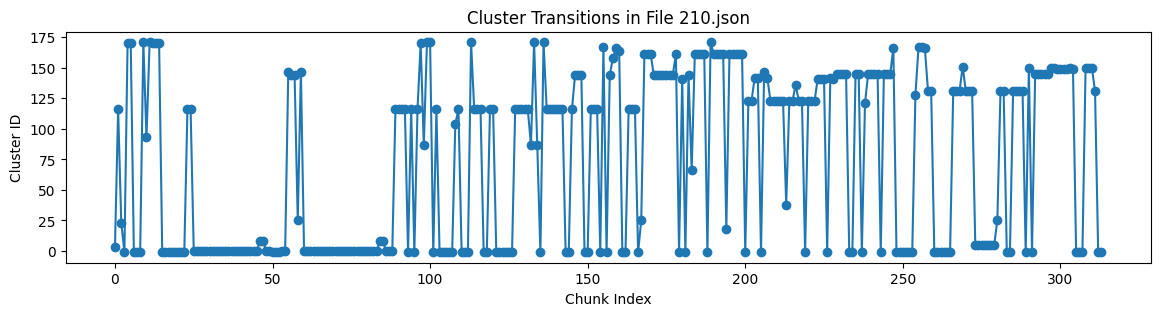

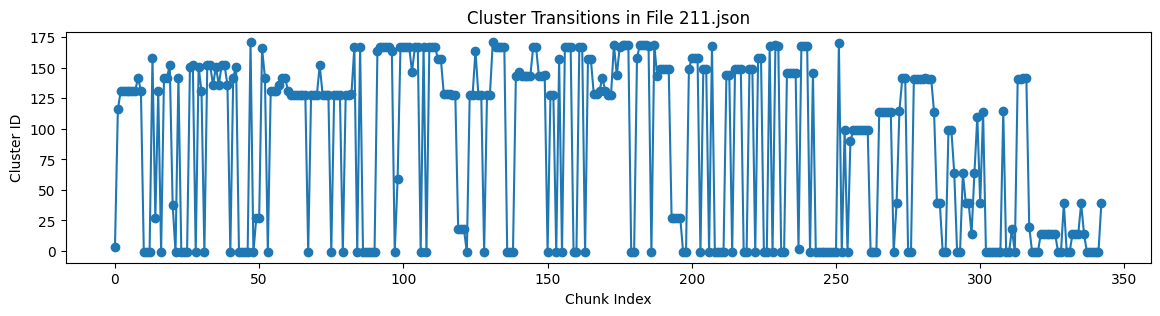

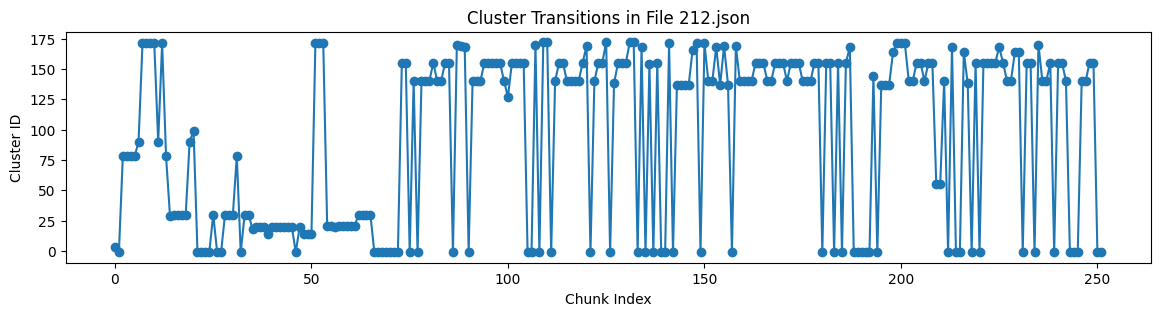

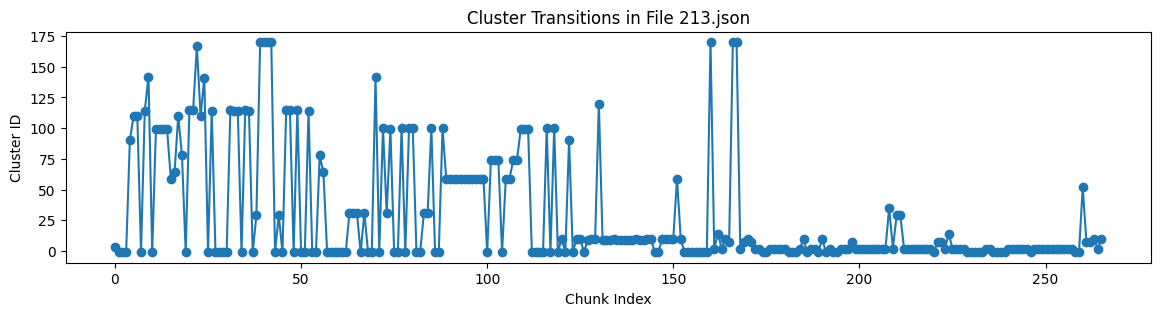

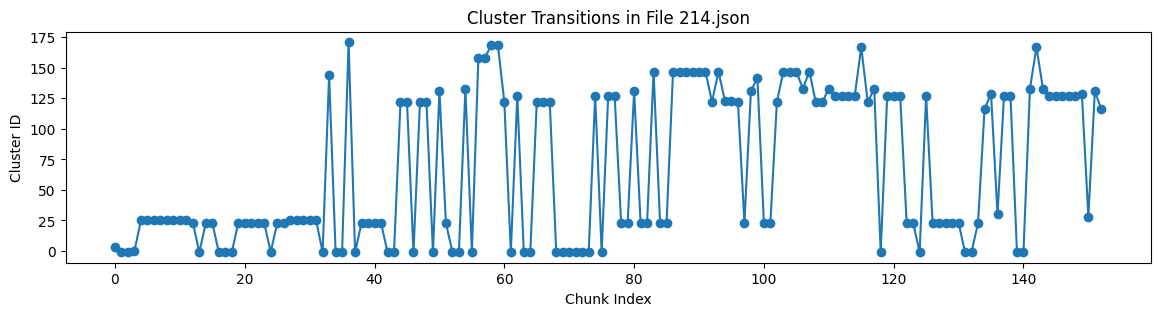

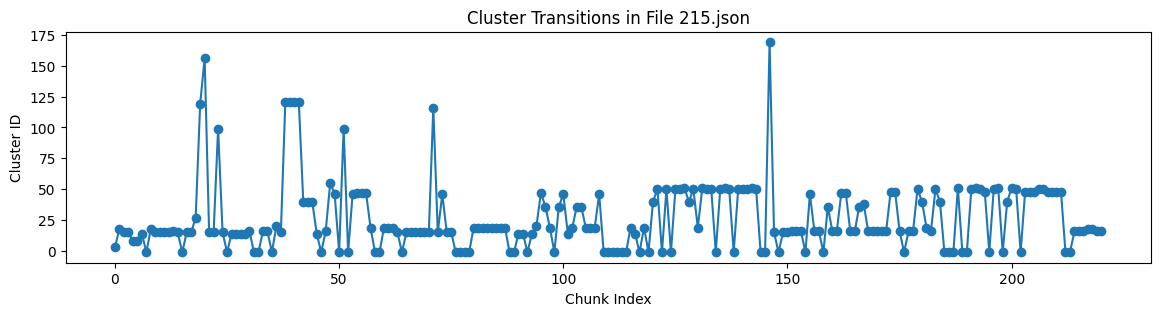

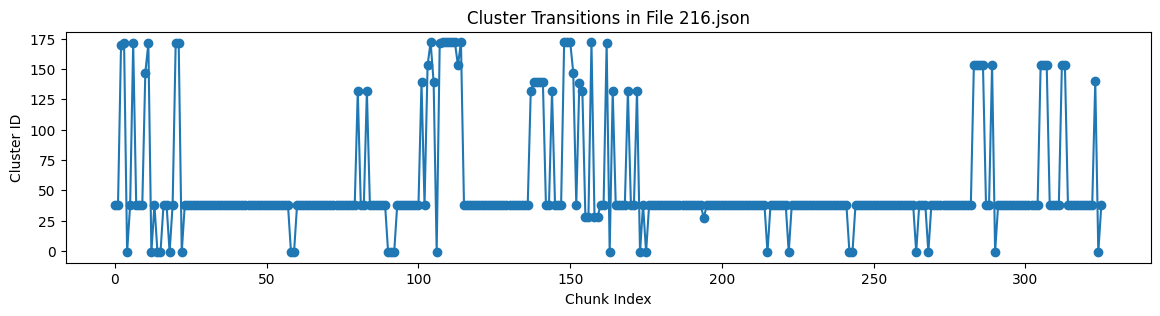

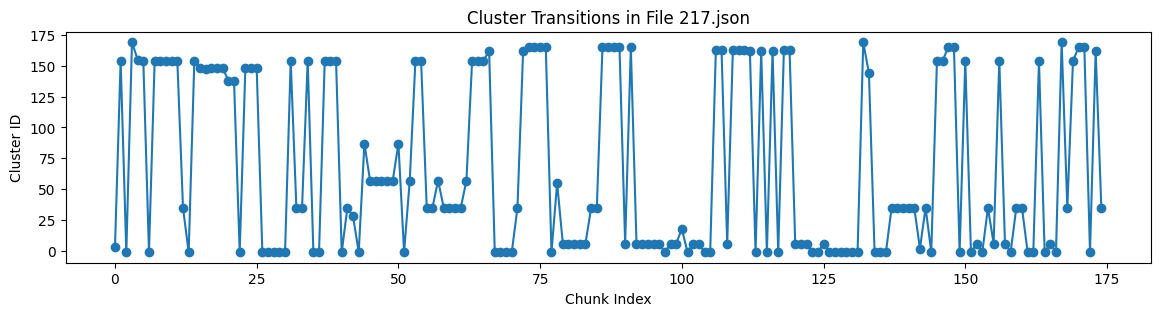

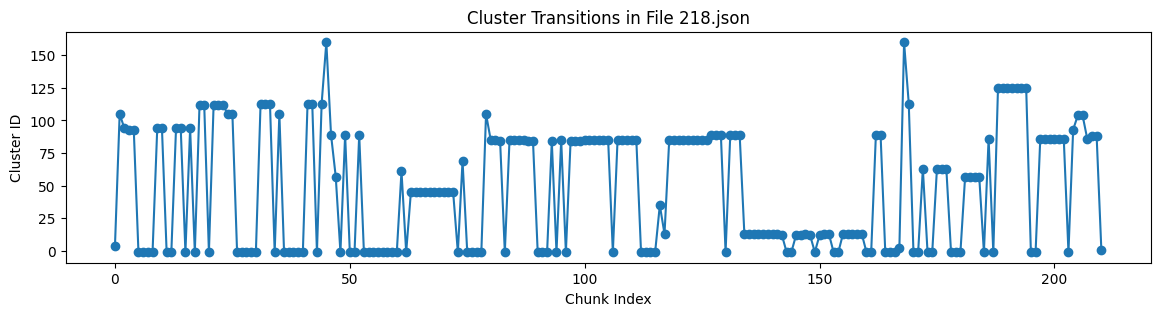

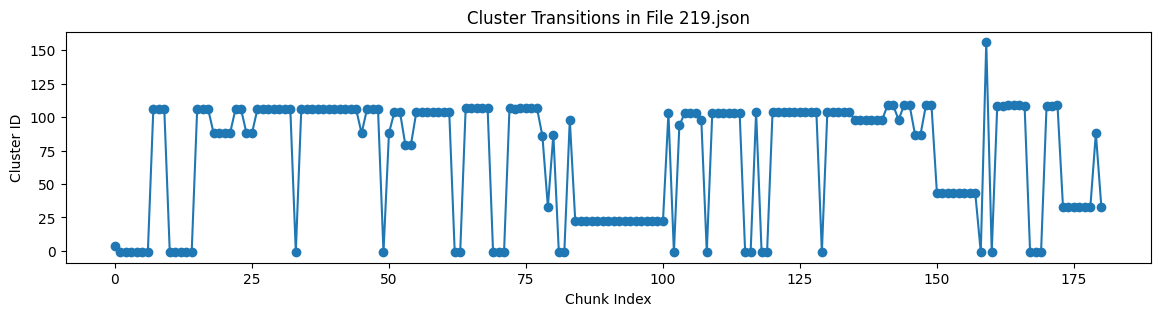

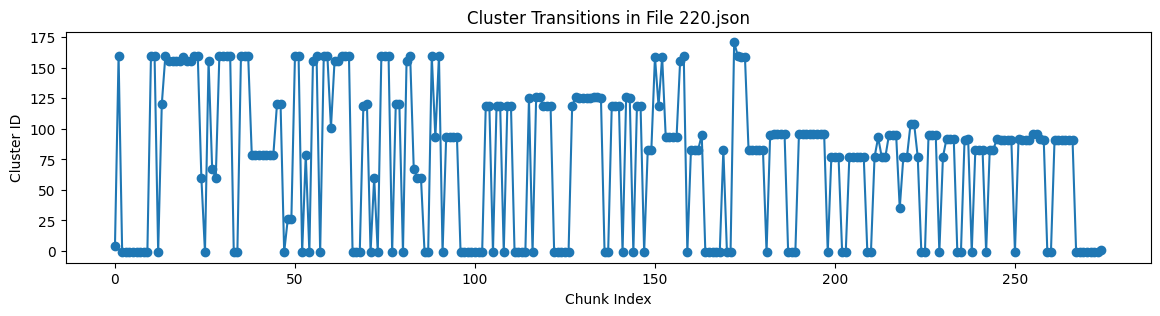

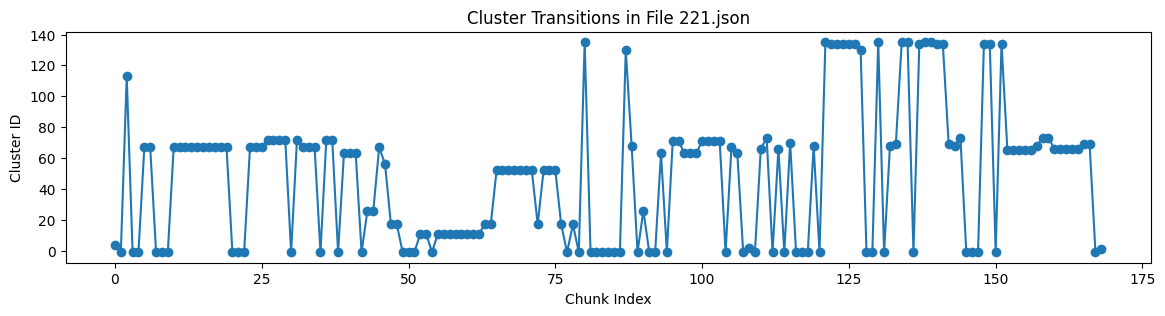

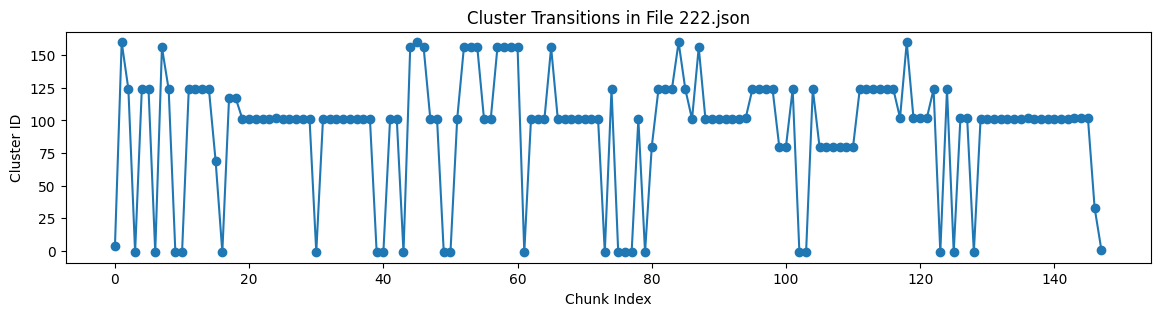

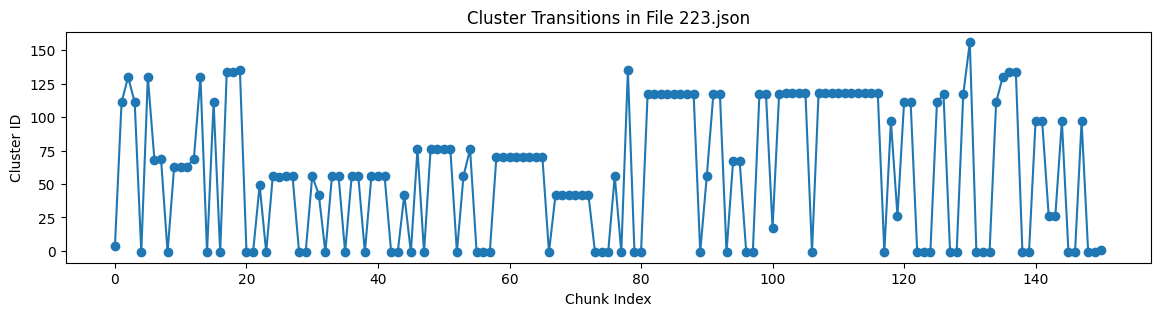

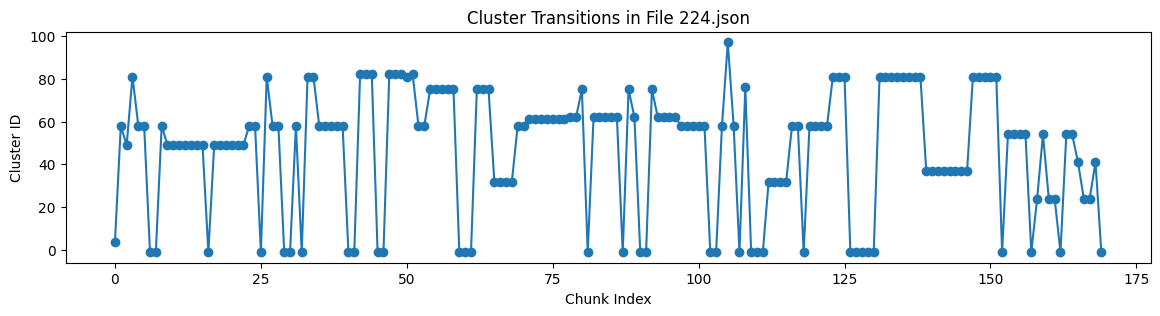

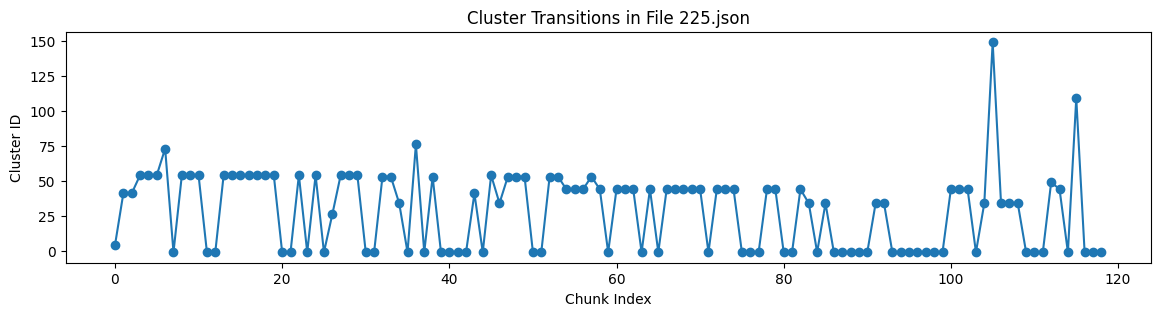

In [4]:
file_ids = df["file"].unique()
for file_id in file_ids:
    video_df = df[df["file"] == file_id]
    plt.figure(figsize=(14, 3))
    plt.plot(video_df["cluster"].values, marker="o", linestyle="-")
    plt.title(f"Cluster Transitions in File {file_id}")
    plt.xlabel("Chunk Index")
    plt.ylabel("Cluster ID")
    plt.show()

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

def top_words_in_cluster(df, cluster_id, top_n=10):
    text = df[df["cluster"] == cluster_id]["text"]
    vec = TfidfVectorizer(stop_words="english", max_features=1000)
    tfidf = vec.fit_transform(text)
    scores = tfidf.sum(axis=0).A1
    indices = scores.argsort()[::-1][:top_n]
    return [vec.get_feature_names_out()[i] for i in indices]

top_words_in_cluster(df, 18)


['vertices',
 'vertex',
 'stack',
 'ordering',
 'okay',
 'order',
 'case',
 'let',
 'want',
 'certain']

C:\Users\ved\AppData\Local\Temp\ipykernel_14636\402957937.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("tab20", n_clusters)


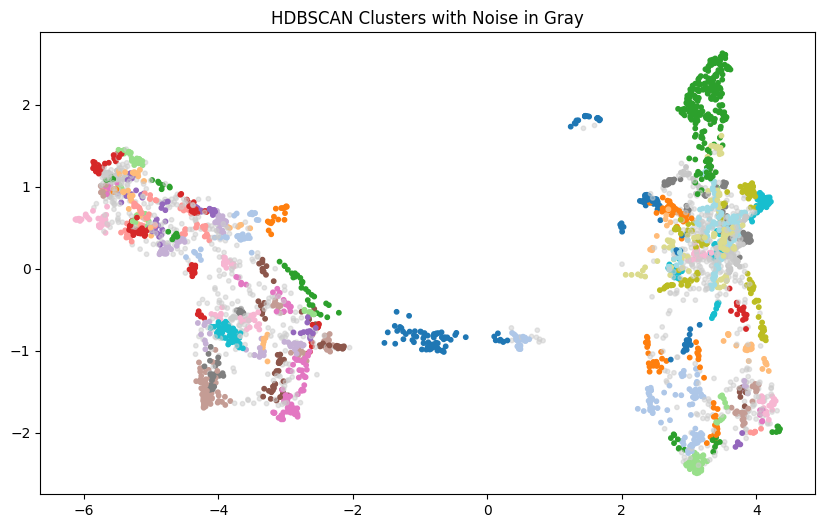

In [6]:
labels = np.array(labels)
is_noise = labels == -1
cluster_labels = labels[~is_noise]
unique_clusters = np.unique(cluster_labels)

n_clusters = len(unique_clusters)
cmap = cm.get_cmap("tab20", n_clusters)

norm = mcolors.Normalize(vmin=0, vmax=n_clusters - 1)
colors = np.array([cmap(norm(i)) for i in range(n_clusters)])

plot_colors = np.zeros((len(labels), 4))  # RGBA
for idx, label in enumerate(labels):
    if label == -1:
        plot_colors[idx] = [0.8, 0.8, 0.8, 0.5]  # light gray for noise
    else:
        plot_colors[idx] = colors[np.where(unique_clusters == label)[0][0]]

plt.figure(figsize=(10, 6))
plt.scatter(pca_vis[:, 0], pca_vis[:, 1], color=plot_colors, s=10)
plt.title("HDBSCAN Clusters with Noise in Gray")
plt.show()